#**House Price Prediction: Amalgamation and Classification**

***The following was implemented by Siddhant Sancheti(016710421).***

# Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing Datasets

In [2]:
url1 = 'https://drive.google.com/file/d/1lKFZEqth_T9wFHN2XTxOhSRwFek1hi9Z/view'
url1 ='https://drive.google.com/uc?id=' + url1.split('/')[-2]
data1 = pd.read_csv(url1)
data1.head(10)
# data1 = pd.read_csv('/content/House_Pricing.csv')
# data1.head(10)

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2721596.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,212968.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,224529.0
5,2005,1,3,2,0,1621,1672,attached,430,0,True,False,True,True,78445,Michelle Highway,NaN,Lake Christinaport,11203,212284.0
6,1979,1,3,2,1,2285,2365,detached,532,0,True,False,True,True,246,Harris Estates,NaN,Morrisport,10924,447738.0
7,1958,1,5,2,0,1745,1741,none,0,0,False,False,False,False,35725,Jessica Isle,NaN,Lake Christinaport,11203,70078.0
8,1958,1,5,2,0,1747,1745,none,0,0,False,False,False,False,35725,Jessica Isle,NaN,Lake Christinaport,11203,155127.0
9,1961,1,1,1,0,998,1161,none,0,242,False,False,False,False,73327,Kurt Crescent,NaN,Lake Christinaport,11203,88448.0


In [3]:
url2 = 'https://drive.google.com/file/d/1KAvZblGU7rVfbhSM8S-RvD3jlsucIPyB/view'
url2 ='https://drive.google.com/uc?id=' + url2.split('/')[-2]
data2 = pd.read_csv(url2)
data2.head(10)
# data2 = pd.read_csv('/content/home_sales-formetdate.csv')
# data2.head(10)

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980,13/10/2014,221900,3,1,1,0,0,fair,10,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6774848,12/9/2014,538000,3,2.25,2,0,0,fair,7,400,1951,1991,98125,47.721,-122.319,1690,7639
2,6999329,25/2/2015,180000,2,1,1,0,0,fair,8,0,1933,0,98028,47.7379,-122.233,2720,8062
3,7773052,12/9/2014,604000,4,3,1,0,0,excellent,6,910,1965,0,98136,47.5208,-122.393,1360,5000
4,7760818,18/2/2015,510000,3,2,1,0,0,fair,6,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7659918,5/12/2014,1225000,4,4.5,1,0,0,fair,8,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,8057033,27/6/2014,257500,3,2.25,2,0,0,FAIR,7,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7249853,15/1/2015,291850,3,1.5,1,0,0,fair,7,0,1963,0,98198,47.4095,-122.315,1650,9711
8,7906980,15/4/2015,229500,3,1,1,0,0,FAIR,7,730,1960,0,98146,47.5123,-122.337,1780,8113
9,7605289,3/12/2015,323000,3,2.5,2,0,0,fair,7,0,2003,0,98038,47.3684,-122.031,2390,7570


# Cleaning Datasets and amalgamation

In [4]:
data2['year'] = data2['date'].str.split('/').str[2]

In [5]:
data2 = data2.drop(['date', 'waterfront','view','renovation','latitude','longitude','lot_size','living_room_size'], axis = 1)

In [6]:
data1 = data1.drop(['full_bathrooms','half_bathrooms','livable_sqft', 'garage_type','garage_sqft','has_pool','has_fireplace','has_central_heating','has_central_cooling'], axis = 1)

In [7]:
data1.rename(columns = {'year_built':'year','sale_price':'price','zip_code':'zipcode', 'num_bedrooms':'bedrooms'}, inplace = True)

In [8]:
data2.dropna(subset=['price'], inplace=True)
data2['price'] = pd.to_numeric(data2.price, errors='coerce')

In [9]:
data2['year'] = pd.to_numeric(data2['year'], errors='coerce').fillna(-1).astype(int)
data2['zipcode'] = pd.to_numeric(data2['zipcode'], errors='coerce').fillna(-1).astype(int)
data2['bedrooms'] = pd.to_numeric(data2['bedrooms'], errors='coerce').fillna(-1).astype(int)



In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23154 entries, 0 to 23153
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             23154 non-null  object 
 1   price          21896 non-null  float64
 2   bedrooms       23154 non-null  int64  
 3   bathrooms      23154 non-null  object 
 4   floors         23154 non-null  object 
 5   condition      23154 non-null  object 
 6   review_score   23154 non-null  object 
 7   basement_size  23154 non-null  object 
 8   built          23154 non-null  object 
 9   zipcode        23154 non-null  int64  
 10  year           23154 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [11]:
# data1.dropna()
# data1['year'] = data1.year.astype(int)
data1['year'] = pd.to_numeric(data1['year'], errors='coerce').fillna(-1).astype(int)



In [12]:
data1.head

<bound method NDFrame.head of        year  stories  bedrooms  total_sqft  carport_sqft  house_number  \
0      1978        1         4        1859             0         42670   
1      1958        1         3        2002             0          5194   
2      2002        1         3        1578           625          4366   
3      2004        1         4        2277             0          3302   
4      2006        1         4        1749             0           582   
...     ...      ...       ...         ...           ...           ...   
42698  1982        1         1         627           200           562   
42699  1983        1         1         624           204         62028   
42700  1983        1         1         618           197         62028   
42701  1981        1         3        1401             0          7456   
42702  1980        1         3        1406             0          7456   

            street_name  unit_number                city  zipcode      price  
0 

In [13]:
data1.value_counts()

year  stories  bedrooms  total_sqft  carport_sqft  house_number  street_name     unit_number  city             zipcode  price   
1929  1        1         703         0             377           Ebony Row       511.0        Lake Carolyn     11140    153843.0    1
1991  2        2         1000        0             34086         Micheal Walk    582.0        East Amychester  11205    113656.0    1
1992  1        3         1163        825           738           Andrea Glen     1367.0       Jeffreyhaven     11913    29380.0     1
                         1169        587           46487         Jessica Greens  1896.0       South Anthony    11353    57459.0     1
                         1345        0             173           Jordan Points   2144.0       Jeffreyhaven     11558    40071.0     1
                                                                                                                                   ..
1980  2        2         1162        0             1402          Ke

In [14]:

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          42703 non-null  int64  
 1   stories       42703 non-null  int64  
 2   bedrooms      42703 non-null  int64  
 3   total_sqft    42703 non-null  int64  
 4   carport_sqft  42703 non-null  int64  
 5   house_number  42703 non-null  int64  
 6   street_name   42703 non-null  object 
 7   unit_number   3088 non-null   float64
 8   city          42703 non-null  object 
 9   zipcode       42703 non-null  int64  
 10  price         42703 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 3.6+ MB


In [15]:



data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23154 entries, 0 to 23153
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             23154 non-null  object 
 1   price          21896 non-null  float64
 2   bedrooms       23154 non-null  int64  
 3   bathrooms      23154 non-null  object 
 4   floors         23154 non-null  object 
 5   condition      23154 non-null  object 
 6   review_score   23154 non-null  object 
 7   basement_size  23154 non-null  object 
 8   built          23154 non-null  object 
 9   zipcode        23154 non-null  int64  
 10  year           23154 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [16]:
df = data1.merge(data2, on = ['year', 'zipcode','price','bedrooms'], how = 'outer')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65857 entries, 0 to 65856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           65857 non-null  int64  
 1   stories        42703 non-null  float64
 2   bedrooms       65857 non-null  int64  
 3   total_sqft     42703 non-null  float64
 4   carport_sqft   42703 non-null  float64
 5   house_number   42703 non-null  float64
 6   street_name    42703 non-null  object 
 7   unit_number    3088 non-null   float64
 8   city           42703 non-null  object 
 9   zipcode        65857 non-null  int64  
 10  price          64599 non-null  float64
 11  id             23154 non-null  object 
 12  bathrooms      23154 non-null  object 
 13  floors         23154 non-null  object 
 14  condition      23154 non-null  object 
 15  review_score   23154 non-null  object 
 16  basement_size  23154 non-null  object 
 17  built          23154 non-null  object 
dtypes: flo

# Saving new amalgamated data

In [18]:
df.to_csv('updated_csv.csv')

# Setting up new dataset under study

In [19]:
df = df.drop(['carport_sqft','unit_number','bathrooms','floors','basement_size','condition','built','id'], axis=1)


In [20]:
df.head()

,year,stories,bedrooms,total_sqft,house_number,street_name,city,zipcode,price,review_score
0,1978,1.0,4,1859.0,42670.0,Lopez Crossing,Hallfort,10907,270897.0,NaN
1,1958,1.0,3,2002.0,5194.0,Gardner Park,Hallfort,10907,302404.0,NaN
2,2002,1.0,3,1578.0,4366.0,Harding Islands,Lake Christinaport,11203,2721596.0,NaN
3,2004,1.0,4,2277.0,3302.0,Michelle Highway,Lake Christinaport,11203,212968.0,NaN
4,2006,1.0,4,1749.0,582.0,Jacob Cape,Lake Christinaport,11203,224529.0,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65857 entries, 0 to 65856
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          65857 non-null  int64  
 1   stories       42703 non-null  float64
 2   bedrooms      65857 non-null  int64  
 3   total_sqft    42703 non-null  float64
 4   house_number  42703 non-null  float64
 5   street_name   42703 non-null  object 
 6   city          42703 non-null  object 
 7   zipcode       65857 non-null  int64  
 8   price         64599 non-null  float64
 9   review_score  23154 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.5+ MB


In [22]:
df['price'].value_counts

<bound method IndexOpsMixin.value_counts of 0         270897.0
1         302404.0
2        2721596.0
3         212968.0
4         224529.0
           ...    
65852    3640900.0
65853     263000.0
65854     619100.0
65855     461000.0
65856     239000.0
Name: price, Length: 65857, dtype: float64>

In [23]:


# Check data type and unique values in review_score column
print(df['review_score'].dtype)
print(df['review_score'].unique())

# Replace non-numeric values with NaN
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')

# Fill missing values with -1 and convert to integers
df['review_score'] = df['review_score'].fillna(-1).astype(int)


object
[nan '10' '7' '8' '6' '5' 'None' '9' '11' '13' '12' '4' '1' '3']


In [24]:
df.head()

,year,stories,bedrooms,total_sqft,house_number,street_name,city,zipcode,price,review_score
0,1978,1.0,4,1859.0,42670.0,Lopez Crossing,Hallfort,10907,270897.0,-1
1,1958,1.0,3,2002.0,5194.0,Gardner Park,Hallfort,10907,302404.0,-1
2,2002,1.0,3,1578.0,4366.0,Harding Islands,Lake Christinaport,11203,2721596.0,-1
3,2004,1.0,4,2277.0,3302.0,Michelle Highway,Lake Christinaport,11203,212968.0,-1
4,2006,1.0,4,1749.0,582.0,Jacob Cape,Lake Christinaport,11203,224529.0,-1


# Exploratory Data Analysis 

<AxesSubplot:xlabel='price'>

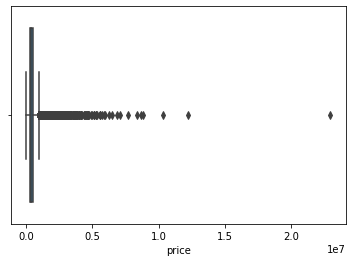

In [25]:
sns.boxplot(x=df['price'])

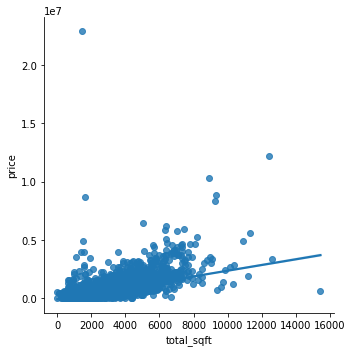

In [26]:

sns.lmplot(x='total_sqft',y='price',data=df)

we can observe a quite good correlation between the square footage and the target

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

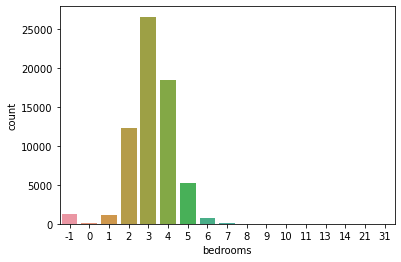

In [27]:
sns.countplot(x='bedrooms',data=df)

apartments with 3 bedrooms are most popular

In [28]:
import plotly.express as ex
ex.pie(df,names='bedrooms',title='bedrooms distribution',hole=0.20)

<AxesSubplot:xlabel='review_score', ylabel='count'>

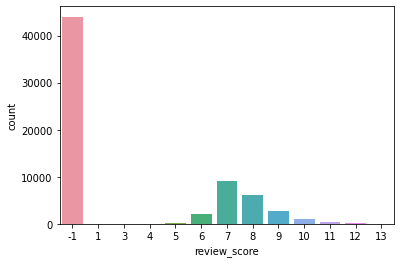

In [29]:
sns.countplot(x='review_score',data=df)

<AxesSubplot:xlabel='stories', ylabel='count'>

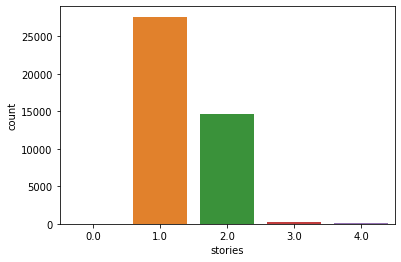

In [30]:

sns.countplot(x='stories',data=df)

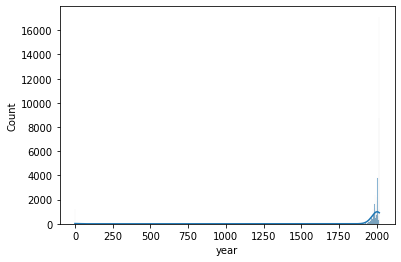

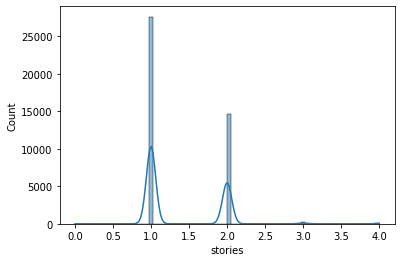

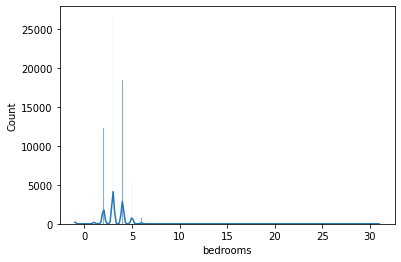

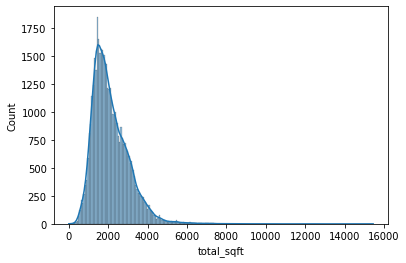

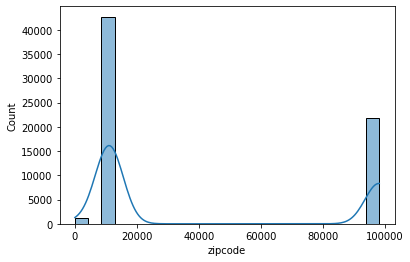

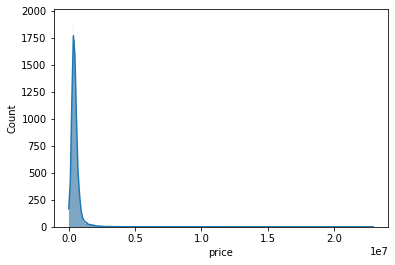

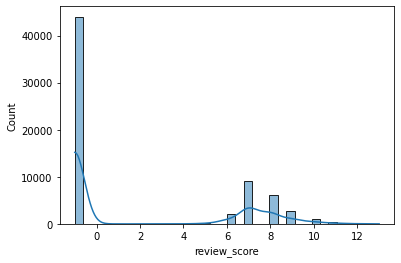

In [31]:
num_cols = ['year',	'stories',	'bedrooms',	'total_sqft',	'zipcode',	'price',	'review_score']
for col in num_cols:
    sns.histplot(df[col], kde = True)
    plt.show()


Data is almost right skewed , let's fix this by using log transformation which is used to transform skewed data to approximately conform to normality

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log



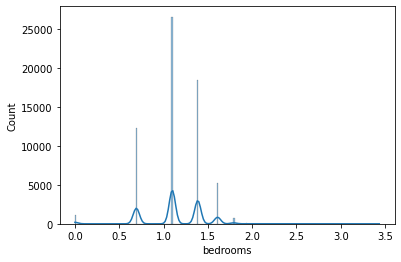

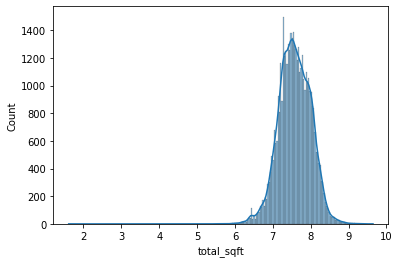

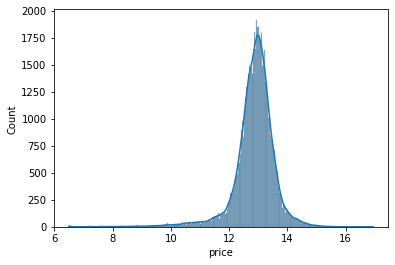

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log



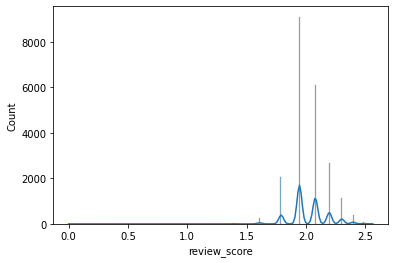

In [32]:
num_cols = ['bedrooms',	'total_sqft',	'price',	'review_score']
for col in num_cols:
    sns.histplot(np.log(df[col]), kde = True)  
    plt.show()

observed some outliers in these columns which we can't fix using log transformation so let's try to fix them manually


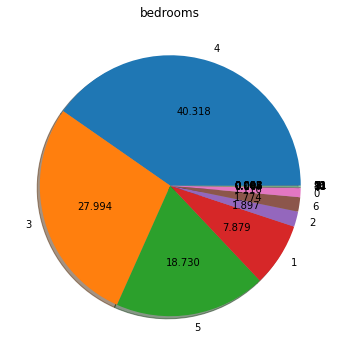

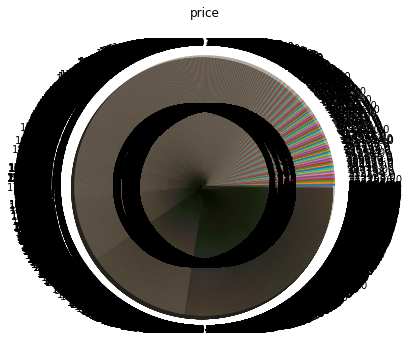

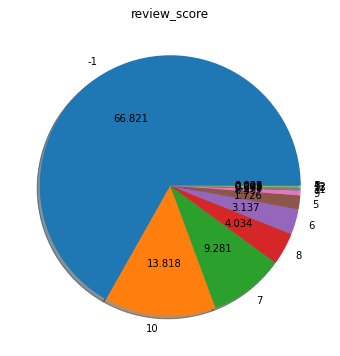

In [33]:
cols = ['bedrooms', 'price', 'review_score']
for col in cols:
    plt.figure(figsize=(6, 6))
    plt.title(col)
    unique_values = df[col].nunique()
    labels = df[col].unique()[:unique_values]
    plt.pie(df[col].value_counts().values[:unique_values], labels=labels, shadow=True, autopct='%.3f')
    plt.show()


In [34]:
cols = ['bedrooms', 'total_sqft', 'price', 'review_score']
for col in cols:
    print(col + ':')
    print(df[col].value_counts())
    print() 

bedrooms:
 3     26552
 4     18436
 2     12335
 5      5189
-1      1249
 1      1168
 6       735
 7        97
 0        42
 8        29
 9         8
 11        5
 10        4
 14        3
 31        3
 13        1
 21        1
Name: bedrooms, dtype: int64

total_sqft:
1446.0    66
1444.0    66
1434.0    65
1442.0    64
1441.0    62
          ..
4848.0     1
3415.0     1
3869.0     1
4565.0     1
7657.0     1
Name: total_sqft, Length: 4448, dtype: int64

price:
450000.0    170
350000.0    169
425000.0    156
325000.0    155
550000.0    155
           ... 
142836.0      1
243076.0      1
86147.0       1
270559.0      1
619100.0      1
Name: price, Length: 27025, dtype: int64

review_score:
-1     44006
 7      9100
 8      6112
 9      2657
 6      2066
 10     1137
 11      393
 5       245
 12       93
 4        28
 13       17
 3         2
 1         1
Name: review_score, dtype: int64



In [35]:
dictt = {'bedrooms': 7,'review_score':10}
bedrooms_replace = [0,8, 9, 10, 11, 13, 14,21,31]
# bathrooms_replace = [7, 8]
# floors_replace = [4]
review_replace = [11,12,13,1,3,4,5]

dictt_replace = {'bedrooms': bedrooms_replace, 'review_score':review_replace}

for col in dictt.keys():
    df[col] = df[col].replace(dictt_replace[col], dictt[col])

In [36]:
cols = ['bedrooms','review_score']
for col in cols:
    print(col + ':')
    print(df[col].value_counts())
    print() 
     

bedrooms:
 3    26552
 4    18436
 2    12335
 5     5189
-1     1249
 1     1168
 6      735
 7      193
Name: bedrooms, dtype: int64

review_score:
-1     44006
 7      9100
 8      6112
 9      2657
 6      2066
 10     1916
Name: review_score, dtype: int64



# Train Test Split for modeling

In [35]:
df = df.dropna()
df.isnull().any()

year            False
stories         False
bedrooms        False
total_sqft      False
house_number    False
street_name     False
city            False
zipcode         False
price           False
review_score    False
dtype: bool

In [36]:
X=df.iloc[:1000,:].drop(['price','street_name','city', 'house_number'],axis=1)
y=df.iloc[:1000,:]['price']

In [37]:
X['total_sqft'].fillna(X['total_sqft'].mean(), inplace=True)
#X['house_number'].fillna(X['house_number'].mode()[0], inplace=True)
X['stories'].fillna(X['stories'].median(), inplace=True)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=2)

In [39]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

X_test.dropna(inplace=True)
y_test = y_test[X_test.index]

In [40]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_train.median(), inplace=True)

In [41]:
from scipy.stats.mstats import winsorize

# apply winsorize() function to each column individually
X_train = X_train.apply(lambda x: winsorize(x, limits=[None, 0.01]))
X_test = X_test.apply(lambda x: winsorize(x, limits=[None, 0.01]))


In [42]:
X_train = X_train.round(2)

In [43]:
print(X_train)

     year  stories  bedrooms  total_sqft  zipcode  review_score
653  1979      2.0         6      3052.0    10346            -1
258  2008      2.0         4      6030.0    11980            -1
951  2007      1.0         3      1591.0    11593            -1
396  1984      1.0         2      1422.0    11353            -1
557  2006      1.0         4      3342.0    10984            -1
..    ...      ...       ...         ...      ...           ...
534  1999      1.0         2       910.0    10748            -1
584  1980      1.0         2      1245.0    10328            -1
493  1988      1.0         1       761.0    10984            -1
527  1990      1.0         3      1725.0    10748            -1
168  1979      1.0         2      1655.0    11071            -1

[900 rows x 6 columns]


## Scaling dataset within the extremes

In [45]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


# Classifiers Initiation

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", 
        "Naive Bayes",
        #  "Linear Regression", "Logistic Regression"
         ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(), 
    GaussianNB(),
    # LinearRegression(),
    # LogisticRegression(max_iter=1000)
    ]

In [52]:
print("Maximum value of X_train_scaled:", np.max(X_train_scaled))
print("Minimum value of X_train_scaled:", np.min(X_train_scaled))

# Check for NaN and infinite values in the data
print("Number of NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Number of infinite values in X_train_scaled:", np.isinf(X_train_scaled).sum())

Maximum value of X_train_scaled: 1.0
Minimum value of X_train_scaled: 0.0
Number of NaN values in X_train_scaled: 0
Number of infinite values in X_train_scaled: 0


# Applying Classifiers and comparing the scores

In [53]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [54]:
max_score = 0.0
max_class = ''
# iterate over classifiers
metrics_df = pd.DataFrame({
    'Classifier': [],
    'MSE' : [], 
    'MAE': [],
    'RSquared': [],
    'Test Accuracy': [],
    'Recall':[],
    'Precision': []
    })
for name, clf in zip(names, classifiers):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    score = 100.0 * clf.score(X_test_scaled, y_test)
    mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
    mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
    r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)
    test_acc = metrics.accuracy_score(y_test, y_pred) * 100
    recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
    precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
    new_row = pd.DataFrame({
    'Classifier': name,   
    'MSE' : mean_absolute_error, 
    'MAE': mean_squared_error,
    'RSquared': r_squared,
    'Test Accuracy': test_acc,
    'Recall': recall,
    'Precision': precision}, index=[0])
    metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)

    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier = Nearest Neighbors, Score (test, accuracy) = 1.00,


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier = Linear SVM, Score (test, accuracy) = 0.00,


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-d

Classifier = RBF SVM, Score (test, accuracy) = 1.00,
Classifier = Decision Tree, Score (test, accuracy) = 0.00,
Classifier = Random Forest, Score (test, accuracy) = 0.00,


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier = Neural Net, Score (test, accuracy) = 0.00,
Classifier = AdaBoost, Score (test, accuracy) = 0.00,
Classifier = Naive Bayes, Score (test, accuracy) = 1.00,
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 1.00


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-d

In [ ]:
metrics_df.head(10)

# Classification with Random Forest

In [99]:
def get_metrics(y_test, y_pred):
  print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
  print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
  print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
  print('Test Accuracy:', metrics.accuracy_score(y_test, y_pred) * 100)
  print('Recall:', metrics.recall_score(y_test, y_pred, average = 'weighted'))
  print('Precision:', metrics.precision_score(y_test, y_pred, average = 'weighted'))
  print('\n confusion matrix:\n',metrics.confusion_matrix(y_test, y_pred))
  clf_report = metrics.classification_report(y_test, y_pred, output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  plt.show()

In [102]:
rf =RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)



MSE :  204448799406.4
MAE :  158780.82
RSquared :  0.03
Test Accuracy: 0.07024116132053383
Recall: 0.0007024116132053383
Precision: 3.4232516188681636e-05

 confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarnin

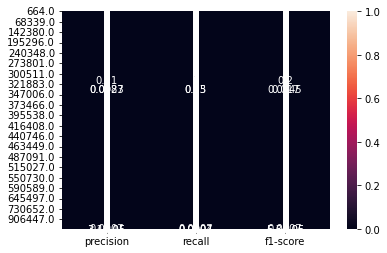

In [103]:
get_metrics(y_test, y_pred_rf)

# Applying Regressor Models

In [104]:
X_reg=df.iloc[:,:].drop(['price','street_name','city', 'house_number'],axis=1)
y_reg=df.iloc[:,:]['price']
X_reg['total_sqft'].fillna(X_reg['total_sqft'].mean(), inplace=True)
X_reg['stories'].fillna(X_reg['stories'].median(), inplace=True)

In [105]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg, test_size=0.10, random_state=2)

X_train_reg.dropna(inplace=True)
y_train_reg = y_train_reg[X_train_reg.index]

X_test_reg.dropna(inplace=True)
y_test_reg = y_test_reg[X_test_reg.index]

X_train_reg.fillna(X_train_reg.mean(), inplace=True)
X_test_reg.fillna(X_train_reg.mean(), inplace=True)

In [106]:
X_train_reg = X_train_reg.round(2)
X_test_reg = X_test_reg.round(2)

X_train_reg = X_train_reg.apply(lambda x: winsorize(x, limits=[None, 0.01]))
X_test_reg = X_test_reg.apply(lambda x: winsorize(x, limits=[None, 0.01]))

In [107]:
scaler.fit(X_train_reg)

X_train_reg_scaled = scaler.transform(X_train_reg)

X_test_reg_scaled = scaler.transform(X_test_reg)

## Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_reg_scaled,y_train_reg)

y_pred_lr = lr.predict(X_test_reg_scaled)

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_metrics_reg(y_test, y_pred):
    print("MSE : " , np.round(mean_squared_error(y_test, y_pred), 2))
    print("MAE : " , np.round(mean_absolute_error(y_test, y_pred), 2))
    print("RSquared : " , np.round(r2_score(y_test, y_pred), 2))


In [112]:
get_metrics_reg(y_test_reg, y_pred_lr)
# score = 100.0 * clf.score(X_test_scaled, y_test)

MSE :  167576220273.03
MAE :  143911.68
RSquared :  0.21


## KNeighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train_scaled,y_train)
y_pred_knr = knr.predict(X_test_scaled)

In [85]:
# score = 100.0 * clf.score(X_test_scaled, y_test)
get_metrics_reg(y_test, y_pred_knr)

MSE :  146780345189.41
MAE :  90659.44
RSquared :  0.31
